#Import Libraries

In [ ]:
import pandas as pd
import gzip
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FuncFormatter
import seaborn as sns

import nltk
from nltk import sent_tokenize, word_tokenize, pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('vader_lexicon')

# Load stopwords
stopwords = stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


#Import data into dataframe

In [ ]:
# Display all floating point numbers in pandas datframes with 2 decimals.
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
# Import data from repository.
url = 'https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_2023/raw/review_categories/Appliances.jsonl.gz'
!wget $url

--2024-12-07 16:18:17--  https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_2023/raw/review_categories/Appliances.jsonl.gz
Resolving datarepo.eng.ucsd.edu (datarepo.eng.ucsd.edu)... 132.239.8.30
Connecting to datarepo.eng.ucsd.edu (datarepo.eng.ucsd.edu)|132.239.8.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 273060794 (260M) [application/x-gzip]
Saving to: ‘Appliances.jsonl.gz’

Appliances.jsonl.gz 100%[===================>] 260.41M  9.18MB/s    in 19s     

2024-12-07 16:18:36 (13.4 MB/s) - ‘Appliances.jsonl.gz’ saved [273060794/273060794]



In [ ]:
# Import data into pandas dataframe.
data = []
# Use gzip module to unzip imported file.
with gzip.open('Appliances.jsonl.gz', 'rt', encoding='utf-8') as f:
  for line in f:
    # Loop through file and append to data list, using json module.
    data.append(json.loads(line))

# Create dataframe from list.
df = pd.DataFrame(data)

#Overview of complete dataset

In [ ]:
# Verfiy dataframe.
df.sample(5)

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
1949700,1.00,No Good at all.,Refrigerator water filtration for drinking wat...,[],B078VZ7ZJR,B087PJ2392,AE4IFHZCL6RB4BO5K6XCKG3YVGMA,1657071347957,0,True
1083633,1.00,Not as pictured,"Did not work, was not an on time shipment",[],B07C8KY1R5,B08PPBZ868,AHQ4E7ROGAVFIHZY25X2TKK4GZ3Q,1539222152216,0,True
499457,5.00,Great filters fit Kerig,These filters are great and fit great in a Kerig,[],B01DNYOKHS,B01DNYOKHS,AG7T4VUKIHSEIYUFKEM2LC2U274A,1611212326705,0,True
1830207,5.00,Fast and reliable,My wife was already looking for a new dryer. ...,[],B072Z9VVVS,B0BWCTGXFT,AEPYY3J3ZTXIJHF33LIX6Y6TWXIQ,1591101480993,0,True
874950,5.00,Perfect,Perfect,[],B08DCS7B7P,B08DCS7B7P,AFX67YCVRVRN46VRGJWTJVMKYHIQ,1617326398031,0,True


In [ ]:
df.shape

(2128605, 10)

In [ ]:
df['rating'].value_counts()

,count
rating,
5.00,1486225
1.00,250453
4.00,208216
3.00,104047
2.00,79664


In [ ]:
# Calculate and show ratings as percentages of total
ratingPercentages = df['rating'].value_counts(normalize=True) * 100
ratingPercentages

,proportion
rating,
5.00,69.82
1.00,11.77
4.00,9.78
3.00,4.89
2.00,3.74


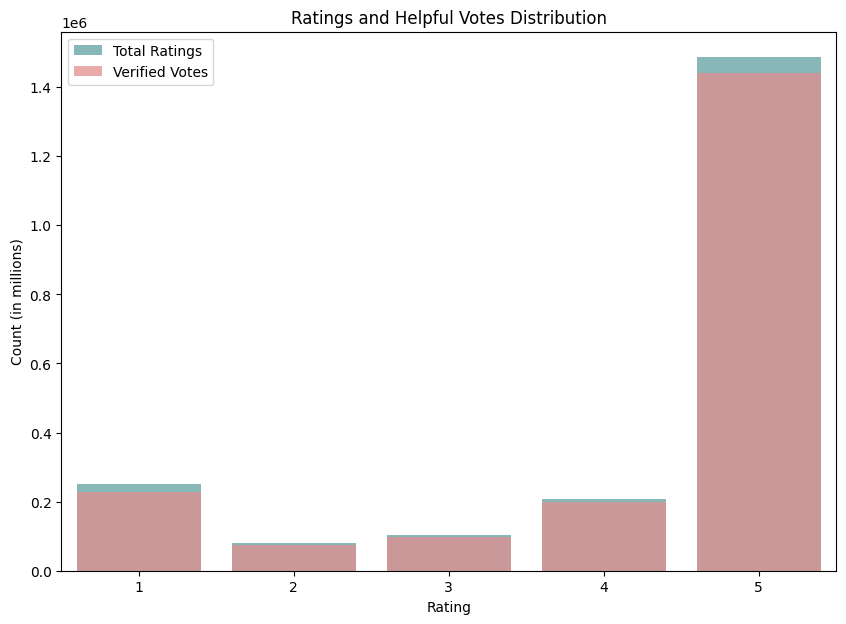

In [ ]:
# Count total occurrences for each rating
ratingCounts = df['rating'].value_counts().sort_index()

# Count occurrences of helpful votes for each rating
verifiedCounts = df[df['verified_purchase'] == True]['rating'].value_counts().sort_index()

# Ensure both Series align
verifiedCounts = verifiedCounts.reindex(ratingCounts.index, fill_value=0)

# Plot
plt.figure(figsize=(10, 7))
sns.barplot(x=ratingCounts.index, y=ratingCounts.values, color='teal',alpha = 0.50, label='Total Ratings')
sns.barplot(x=verifiedCounts.index, y=verifiedCounts.values, color='lightcoral', alpha=0.75, label='Verified Votes')

# Adding labels and legend
plt.xlabel('Rating')
plt.ylabel('Count (in millions)')
plt.title('Ratings and Helpful Votes Distribution')
plt.xticks(range(5), [1, 2, 3, 4, 5])
plt.show()

In [ ]:
print(f'The dataset contains: {df.shape} rows and columns.')
print('\nThe contained collums have the following datatypes:')
print(df.dtypes)

The dataset contains: (2128605, 10) rows and columns.

The contained collums have the following datatypes:
rating               float64
title                 object
text                  object
images                object
asin                  object
parent_asin           object
user_id               object
timestamp              int64
helpful_vote           int64
verified_purchase       bool
dtype: object


In [ ]:
print(f"Unique Parent ASINs:\n{df['parent_asin'].value_counts()}\n")
print(f"\nUnique ASINs:\n{df['asin'].value_counts()}")

Unique Parent ASINs:
parent_asin
B0B3DB5HTC    12027
B07RNJY499    11620
B07WTXWC32     8519
B08YBGCNHP     7330
B000AST3AK     7030
              ...  
B001DPVG2M        1
B00N8Q65BG        1
B01JF5MY0E        1
B01M70QF42        1
B013KDBPSY        1
Name: count, Length: 94319, dtype: int64


Unique ASINs:
asin
B01DLEL4EM    8848
B000AST3AK    7030
B00LGEKOMS    6984
B01KJ2FVFW    6140
B00UXG4WR8    5896
              ... 
B009DUK51C       1
B0BR5GKL4F       1
B017KJ9FFO       1
B01LQZA91W       1
B0C1BLSB1V       1
Name: count, Length: 104237, dtype: int64


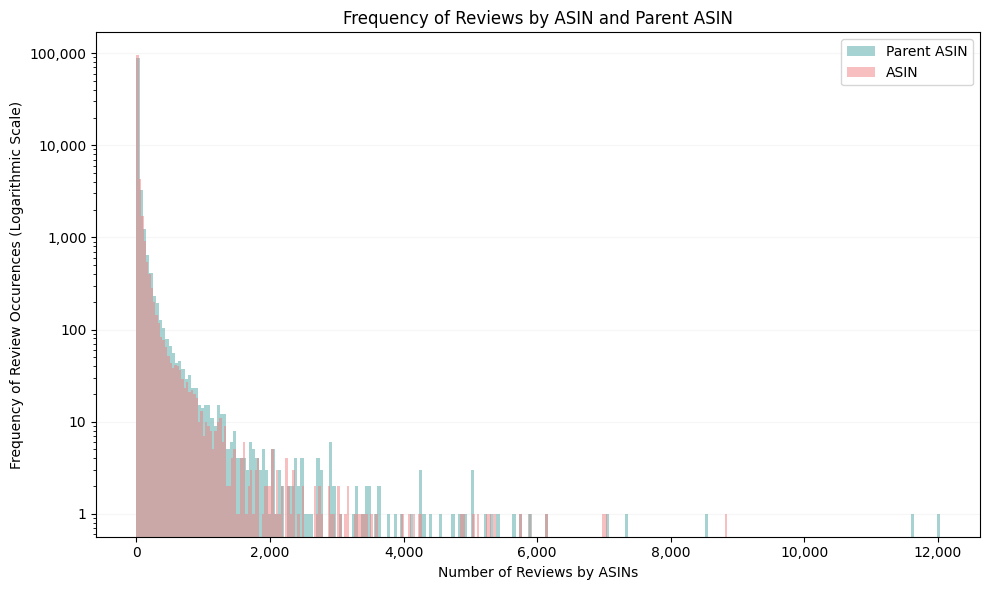

In [ ]:
# Create plot
plt.figure(figsize=(10, 6))

# Histogram for 'parent_asin'
plt.hist(df['parent_asin'].value_counts(), bins=250, alpha=0.35, color='teal', label='Parent ASIN', log=True)
plt.hist(df['asin'].value_counts(), bins=250, alpha=0.5, color='lightcoral', label='ASIN', log=True)

# Add labels, title, legend, and grid
plt.xlabel('Number of Reviews by ASINs')
plt.ylabel('Frequency of Review Occurences (Logarithmic Scale)')
plt.title('Frequency of Reviews by ASIN and Parent ASIN')
plt.legend()
plt.grid(axis='y', alpha=0.1)

# Adjust y-axis to display integers instead of scientific notation
ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=False, useOffset=False))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

# Show plot
plt.tight_layout()
plt.show()

#Create and verify random sample from dataset

In [ ]:
# Get sample size for each class
sample_size = 200000

# Stratified sampling keeping all columns
sampled_df = df.groupby('verified_purchase', group_keys=False).apply(
    lambda x: x.sample(n=min(int(sample_size * len(x)/len(df)), len(x)),
                      random_state=42))

<ipython-input-7-f63c1dc2bcd1>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby('verified_purchase', group_keys=False).apply(


In [ ]:
# Verify columns
print("Original columns:", df.columns)
print("Sampled columns:", sampled_df.columns)

Original columns: Index(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase'],
      dtype='object')
Sampled columns: Index(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase'],
      dtype='object')


In [ ]:
print("Sample of data:")
print(sampled_df[['verified_purchase', 'rating', 'helpful_vote', 'text', 'title']].head())

Sample of data:
         verified_purchase  rating  helpful_vote  \
804458               False    5.00             3   
163886               False    1.00             1   
1895373              False    5.00             0   
937587               False    2.00             0   
488903               False    5.00             0   

                                                      text  \
804458   [[VIDEOID:480dcaedb79ca228ea4ff08a55e34056]] I...   
163886   After a while, the tanks will malfunction and ...   
1895373                           Cap fits great on filter   
937587   They are beautiful out of the box.  But even t...   
488903   It makes the good ice! Such a great price for ...   

                                                     title  
804458   Very crunchable! As close to Sonic ice as I've...  
163886                     Overflows and floods your floor  
1895373                             Perfect cap for filter  
937587                          Rusted in less than a 

In [ ]:
# Verify Purchase distributions
print("Rating distribution in sample:")
print(sampled_df['rating'].value_counts(normalize=True))

Rating distribution in sample:
rating
5.00   0.70
1.00   0.12
4.00   0.10
3.00   0.05
2.00   0.04
Name: proportion, dtype: float64


In [ ]:
# Get overview of rating distribution.
rating_counts = sampled_df['rating'].value_counts()
rating_counts

,count
rating,
5.00,139605
1.00,23394
4.00,19605
3.00,9705
2.00,7690


##Sample dataframe plots

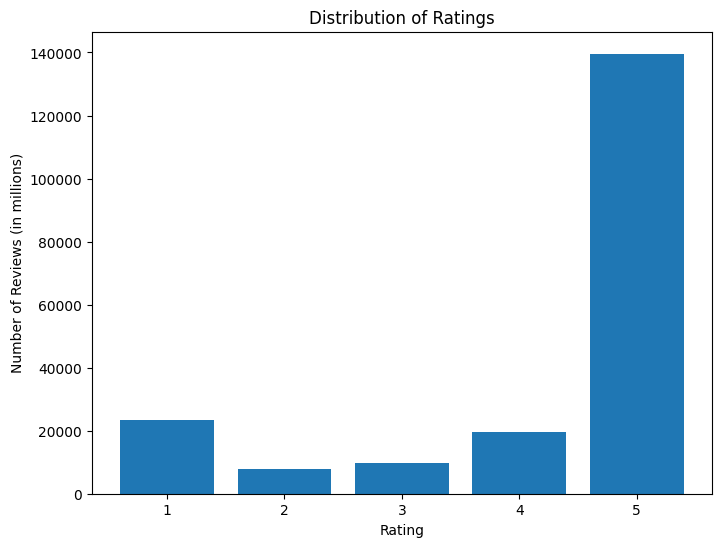

In [ ]:
# Plot distribution of ratings.
plt.figure(figsize=(8, 6))
plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel('Rating')
plt.ylabel('Number of Reviews (in millions)')
plt.title('Distribution of Ratings')
plt.show()

In [ ]:
# Finding max length
sampled_df['title'].str.len().max()

236

In [ ]:
#Finding shortest title
min_title_length = sampled_df['title'].str.len().min()
min_title_length

1

In [ ]:
#Extracting value of title
sampled_df.loc[sampled_df['title'].str.len() == min_title_length, 'title'].values[0]

'👍'

In [ ]:
# Calulate average text length filtering by text length and selecting the 'text' column.
average_text_length_by_rating = sampled_df.groupby('rating')['text'].apply(lambda x: x.str.len().mean())
# Display average text length per review category.
round(average_text_length_by_rating,2)

,text
rating,
1.00,240.43
2.00,269.49
3.00,250.45
4.00,226.43
5.00,138.88


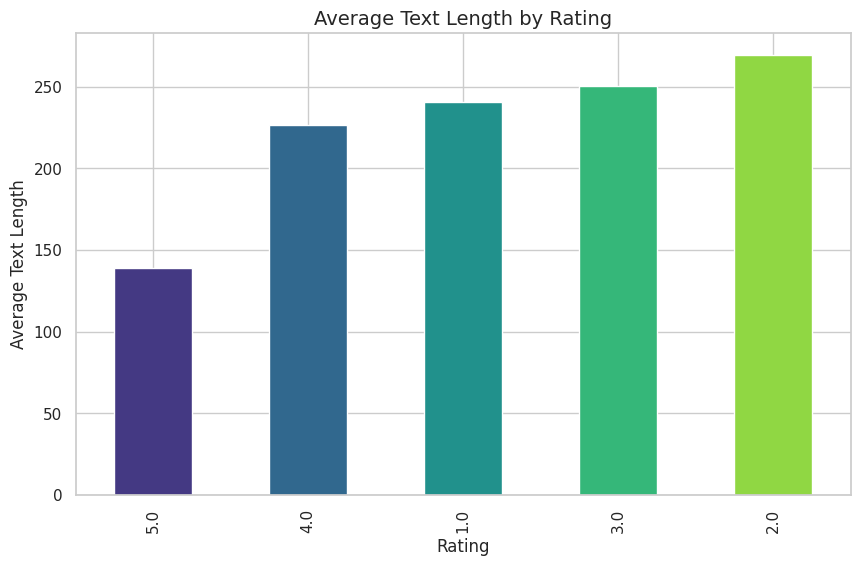

In [ ]:
# Sort the average text length
average_text_length_by_rating = average_text_length_by_rating.sort_values()

#Defining color based on average length
colors = sns.color_palette('viridis', len(average_text_length_by_rating))

#Setting theme of vizualization
sns.set_theme(style="whitegrid")

# Plotting the result
plt.figure(figsize=(10, 6))
average_text_length_by_rating.plot(kind='bar', color=colors)

# Add title and labels
plt.title('Average Text Length by Rating', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Average Text Length', fontsize=12)

# Show the plot
plt.show()

In [ ]:
#Ultimately, we need to remove some columns because they're irrelevant to the modeling process
sampled_df.columns

Index(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase'],
      dtype='object')

In [ ]:
# Print unqiue values for the 'helpful' vote column.
sampled_df['helpful_vote'].unique()

array([   3,    1,    0,    2,    4,    6,    7,   13,   15,    5,   58,
         12,    8,   55,   51,   43,   29,   16,   46,   17,    9,   33,
        127,  956,   50,   28,   45,   11,   14,   75,   23,   49,   34,
         10,  139,   20,  230,   30,   18,   25,   21,   19,   24,   22,
         26,  126,   38,   56,   37,   68,   60,   35,  243,   85,  144,
         32,   41,  119,   80,  207,  179,  108,   47,   42,   97,   64,
         39,   61,   31,   36,   92,   27,   57,   76,  615,   95,   66,
         81,  109,  158,  117,   65, 1009,   48,   62,  203,   72,   93,
         67,   40,  114,   71,   73,  242,   69,   44,   63,   59,   52,
         77,   53,  636,   94,   79,  416,   88,  944,  110,   78,  205,
         98,   87,  101,  213,  103,  247,  122,  163,  100,   86,   82,
        159,  116,  132,   83,  146,  115,  713,  282,   74,   91,  358,
         54,  525,  162,  178,  125, 1389,  184,  274,  143,  150,  160,
         84,  264,  121,  602,  141,  112,  311,  2

In [ ]:
# Query information on contents of 'helpful vote' column.
sampled_df['helpful_vote'].info()

<class 'pandas.core.series.Series'>
Index: 199999 entries, 804458 to 111944
Series name: helpful_vote
Non-Null Count   Dtype
--------------   -----
199999 non-null  int64
dtypes: int64(1)
memory usage: 3.1 MB


In [ ]:
# Print average helpful votes by rating category.
round(sampled_df.groupby('rating')['helpful_vote'].mean(),2)

,helpful_vote
rating,
1.00,1.83
2.00,1.13
3.00,1.15
4.00,1.08
5.00,0.70


In [ ]:
# Print number of helful ratings by rating category.
rating_helpful = sampled_df.groupby('rating')['helpful_vote'].count().sort_values(ascending = False)
rating_helpful

,helpful_vote
rating,
5.00,139605
1.00,23394
4.00,19605
3.00,9705
2.00,7690


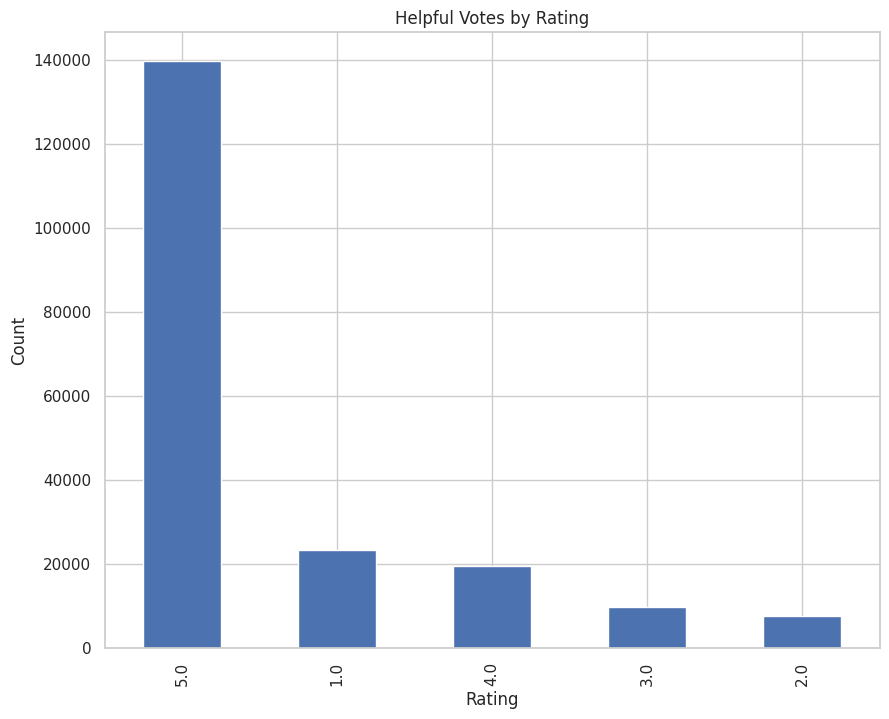

In [ ]:
# Plot  number of helpful ratings by category.
rating_helpful.plot(kind = 'bar', figsize=(10,8))
plt.title('Helpful Votes by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.ticklabel_format(style='plain', axis='y')

In [ ]:
#Removing scientific notation
#pd.set_option('display.float_format', '{:.2f}'.format)

sampled_df.describe()

,rating,timestamp,helpful_vote
count,199999.00,199999.00,199999.00
mean,4.22,1561814503052.08,0.91
std,1.38,86134508552.34,10.37
min,1.00,1087273359000.00,0.00
25%,4.00,1501999569038.50,0.00
50%,5.00,1578863702252.00,0.00
75%,5.00,1628826889923.00,0.00
max,5.00,1694237464113.00,1641.00


In [ ]:
# Converting boolean values (True and False) to binary values (0 and 1).
sampled_df['verified_purchase'] = sampled_df['verified_purchase'].apply(lambda x: 0 if x else 1)

In [ ]:
# Count number of (un-)verified reviews.
vp_counts = sampled_df['verified_purchase'].value_counts()
vp_counts

,count
verified_purchase,
0,191680
1,8319


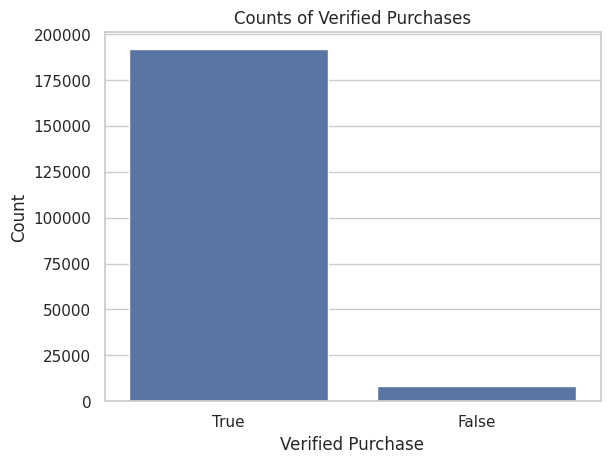

In [ ]:
sns.barplot(x = vp_counts.index, y = vp_counts.values)

#Setting theme of vizualization
sns.set_theme(style="whitegrid")


#Labeling the visualization
plt.xlabel('Verified Purchase')
plt.ylabel('Count')
plt.title('Counts of Verified Purchases')
plt.xticks(ticks = [0,1], labels = [True, False])

# Format the y-axis labels to use '.' as a thousand separator
# formatter = FuncFormatter(lambda x, _: f'{x:,.0f}'.replace('', '.'))
# plt.gca().yaxis.set_major_formatter(formatter)

plt.ticklabel_format(style='plain', axis='y')

plt.show()

In [ ]:
#Dropping columns
df = sampled_df.drop(['images', 'asin', 'parent_asin', 'user_id', 'timestamp'], axis=1)

In [ ]:
# Verify columns have been dropped.
df.columns

Index(['rating', 'title', 'text', 'helpful_vote', 'verified_purchase'], dtype='object')

In [ ]:
df.shape

(199999, 5)

In [ ]:
round(df['title'].str.len().mean(),2) #Finding average length of title

22.3

In [ ]:
#Creating a function to remove non-alphabet strings while filtering out stopwords and producing the most common based on the user input
def freq_words(w, n):
  fd = nltk.FreqDist(t.lower() for t in w if t.isalpha() and t.lower() not in stopwords)

  return fd.most_common(n)

#Text Analysis

##Word Frequencies

In [ ]:
# Return 30 most frequent words in titles with number of occurences.
freq_words(df['title'], 30)

[('perfect', 1469),
 ('great', 1325),
 ('good', 1005),
 ('works', 694),
 ('awesome', 360),
 ('nice', 357),
 ('excellent', 354),
 ('ok', 246),
 ('easy', 246),
 ('filter', 228),
 ('quality', 228),
 ('filters', 191),
 ('junk', 185),
 ('disappointed', 180),
 ('value', 151),
 ('worked', 149),
 ('price', 148),
 ('fits', 141),
 ('amazing', 103),
 ('satisfied', 98),
 ('fit', 95),
 ('thanks', 93),
 ('excelente', 92),
 ('happy', 81),
 ('love', 75),
 ('garbage', 73),
 ('cheap', 73),
 ('convenient', 67),
 ('wonderful', 65),
 ('sturdy', 61)]

In [ ]:
# Return 30 most frequent words in text with number of occurences.
freq_words(df['text'], 30)

[('good', 638),
 ('great', 596),
 ('perfect', 444),
 ('excellent', 227),
 ('ok', 212),
 ('works', 176),
 ('nice', 125),
 ('thanks', 101),
 ('awesome', 98),
 ('na', 67),
 ('excelente', 60),
 ('like', 56),
 ('nothing', 56),
 ('worked', 55),
 ('refrigerator', 43),
 ('price', 41),
 ('easy', 38),
 ('none', 35),
 ('fits', 25),
 ('yes', 24),
 ('coffee', 22),
 ('love', 21),
 ('fine', 18),
 ('dryer', 17),
 ('liked', 17),
 ('bueno', 17),
 ('wonderful', 15),
 ('replacement', 15),
 ('perfecto', 15),
 ('amazing', 14)]

In [ ]:
# Create frequency distribution of most common words appearing in titles. Convert to lowercase to avoid dupliactes, filter for alphabetic characters and stopwords.
fdist1 = nltk.FreqDist(t.lower() for t in df['title'] if t.isalpha() and t.lower() not in stopwords)

In [ ]:
# Output frequency distribution.
fdist1.tabulate(10)

  perfect     great      good     works   awesome      nice excellent        ok      easy    filter 
     1469      1325      1005       694       360       357       354       246       246       228 


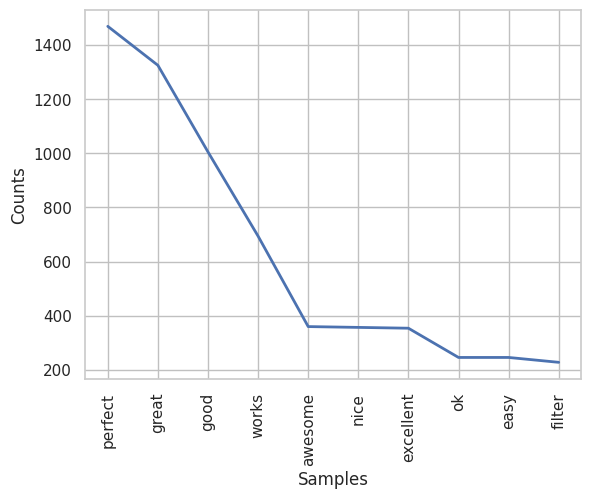

In [ ]:
# Plot 10 most frequent words.
fdist1.plot(10, cumulative=False)
plt.show()

In [ ]:
# Create same frequency distribution for review contents.
fdist2 = nltk.FreqDist(t.lower() for t in df['text'] if t.isalpha() and t.lower() not in stopwords)

In [ ]:
fdist2.tabulate(10)

     good     great   perfect excellent        ok     works      nice    thanks   awesome        na 
      638       596       444       227       212       176       125       101        98        67 


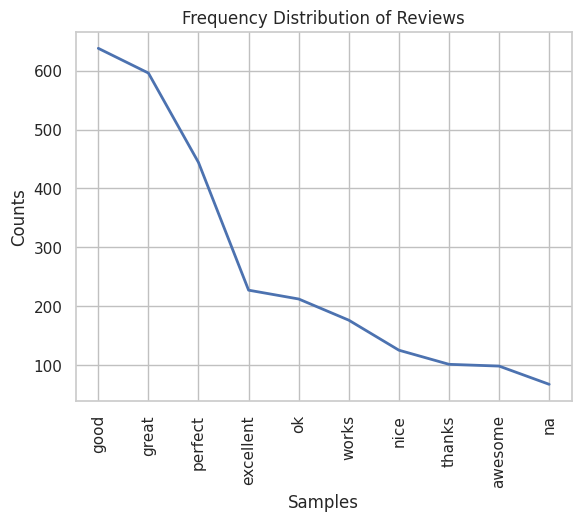

In [ ]:
fdist2.plot(10, title="Frequency Distribution of Reviews", cumulative=False)
plt.show()

## Text Preprocessing

In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 11.6 MB/s eta 0:00:00


In [ ]:
#For regex
import re
import contractions
#Creating a do it all function, allowing us to preprocess text efficiently
def preprocess_text(txt):
   # Handle contractions
   txt = contractions.fix(txt)

   # Convert to lowercase
   txt = txt.lower()

   # Remove extra spaces and special characters
   txt = ' '.join(txt.split())
   # Keep only letters, numbers, spaces, ! and ?
   txt = re.sub(r'[^a-zA-Z0-9\s!?]', '', txt)

   # Tokenize
   tokens = word_tokenize(txt)

   # Remove stopwords
   tokens = [token for token in tokens if token not in stopwords]

   # Lemmatize
   wnl = nltk.WordNetLemmatizer()
   tokens = [wnl.lemmatize(token) for token in tokens]

   return ' '.join(tokens)

In [ ]:
#Add progress bar as function operates
from tqdm import tqdm

tqdm.pandas()

#Apply text preprocessing function to review column(text)
df['text'] = df['text'].progress_apply(preprocess_text)

100%|██████████| 199999/199999 [01:55<00:00, 1724.93it/s]


In [ ]:
df['text'].head()

,text
804458,videoid480dcaedb79ca228ea4ff08a55e34056 idea n...
163886,tank malfunction empty onto floor happened thi...
1895373,cap fit great filter
937587,beautiful box even though supposedly made stai...
488903,make good ice ! great price maker take much co...


## Composing NLP-based Features

POS Tagging: Our objective is to calculate the number of tags, specifically nouns, adjectives, and verbs, in the review text.

In [ ]:
#Documentation: https://spacy.io/usage/linguistic-features
import spacy

nlp = spacy.load("en_core_web_sm")
#Counting number of nouns in each review, utilizing spacy capabilities
def noun_counter(txt):
  doc = nlp(txt)
  return sum(1 for token in doc if token.pos_ == 'NOUN')

In [ ]:
df['n_nouns'] = df['text'].progress_apply(noun_counter)

100%|██████████| 199999/199999 [26:57<00:00, 123.68it/s]


In [ ]:
df['n_nouns'].head()

,n_nouns
804458,37
163886,7
1895373,1
937587,2
488903,4


In [ ]:
df.groupby('rating')['n_nouns'].agg(['mean', 'min', 'max'])

,mean,min,max
rating,,,
1.00,8.94,0,286
2.00,9.79,0,209
3.00,9.12,0,289
4.00,8.42,0,410
5.00,5.33,0,739


In [ ]:
df.groupby('verified_purchase')['n_nouns'].sum()

,n_nouns
verified_purchase,
0,1134411
1,147808


In [ ]:
#Counting number of adjectives in each review, utilizing spacy capabilities
def adj_counter(txt):
  doc = nlp(txt)
  return sum(1 for token in doc if token.pos_ == 'ADJ')

In [ ]:
df['n_adjectives'] = df['text'].progress_apply(adj_counter)

100%|██████████| 199999/199999 [26:50<00:00, 124.18it/s]


In [ ]:
df['n_adjectives'].head()

,n_adjectives
804458,12
163886,4
1895373,1
937587,1
488903,4


In [ ]:
df.groupby('rating')['n_adjectives'].agg(['mean', 'min', 'max'])

,mean,min,max
rating,,,
1.00,3.00,0,122
2.00,3.74,0,94
3.00,3.72,0,104
4.00,3.68,0,172
5.00,2.55,0,251


In [ ]:
df.groupby('verified_purchase')['n_adjectives'].sum()

,n_adjectives
verified_purchase,
0,507523
1,55483


In [ ]:
#Counting number of verbs in each review, utilizing spacy capabilities
def verb_counter(txt):
  doc = nlp(txt)
  return sum(1 for token in doc if token.pos_ == 'VERB')

In [ ]:
df['n_verbs'] = df['text'].progress_apply(verb_counter)

100%|██████████| 199999/199999 [26:51<00:00, 124.10it/s]


In [ ]:
df['n_verbs'].head()

,n_verbs
804458,18
163886,4
1895373,1
937587,2
488903,2


In [ ]:
df.groupby('rating')['n_verbs'].agg(['mean', 'min', 'max'])

,mean,min,max
rating,,,
1.00,5.25,0,154
2.00,5.61,0,116
3.00,5.00,0,118
4.00,4.41,0,281
5.00,2.75,0,355


In [ ]:
df.groupby('verified_purchase')['n_verbs'].sum()

,n_verbs
verified_purchase,
0,608906
1,76416


In [ ]:
#Counting number of adverbs in each review, utilizing spacy capabilities
def adv_counter(txt):
  doc = nlp(txt)
  return sum(1 for token in doc if token.pos_ == 'ADV')

In [ ]:
df['n_adverbs'] = df['text'].progress_apply(adv_counter)

100%|██████████| 199999/199999 [33:50<00:00, 98.51it/s] 


In [ ]:
df.groupby('verified_purchase')['n_adverbs'].sum()

,n_adverbs
verified_purchase,
0,231074
1,28264


In [ ]:
def mention_entity(text):
    doc = nlp(text)
    has_brand = any(ent.label_ == 'ORG' for ent in doc.ents) #Checking if brand is mentioned
    has_product = any(ent.label_ == 'PRODUCT' for ent in doc.ents) #Checking if product is mentioned

    # Return 0 if either brand or product is present, 1 if neither
    if has_brand or has_product:
        return 0
    else:
        return 1

In [ ]:
df['mention_named_entity'] = df['text'].progress_apply(mention_entity)

100%|██████████| 199999/199999 [26:49<00:00, 124.27it/s]


In [ ]:
df['mention_named_entity'].value_counts()

,count
mention_named_entity,
1,188656
0,11343


In [ ]:
df.groupby('verified_purchase')['mention_named_entity'].sum()

,mention_named_entity
verified_purchase,
0,181444
1,7212


In [ ]:
#Let's preprocess the text before applying the mention_entity function
df['title'] = df['title'].progress_apply(preprocess_text)

100%|██████████| 199999/199999 [00:28<00:00, 6991.04it/s]


In [ ]:
df['n_verbs_title'] = df['title'].progress_apply(verb_counter) #Counting number of verbs in each title review, utilizing spacy capabilities

100%|██████████| 199999/199999 [24:21<00:00, 136.84it/s]


In [ ]:
df.groupby('verified_purchase')['n_verbs_title'].sum()

,n_verbs_title
verified_purchase,
0,82544
1,4529


In [ ]:
#Applying the mention_entity function
df['mention_named_entity_title'] = df['title'].progress_apply(mention_entity)

100%|██████████| 199999/199999 [25:35<00:00, 130.22it/s]


In [ ]:
df['mention_named_entity_title'].value_counts()

,count
mention_named_entity_title,
0,196443
1,3556


In [ ]:
from textblob import TextBlob

#Extracting sentiment scores
def get_sentiment_scores(txt):
    analysis = TextBlob(txt)
    return analysis.sentiment.polarity

In [ ]:
df['review_sentiment_scores'] = df['text'].progress_apply(get_sentiment_scores)

100%|██████████| 199999/199999 [00:55<00:00, 3603.10it/s]


In [ ]:
df['review_sentiment_scores'].describe()

,review_sentiment_scores
count,199999.00
mean,0.31
std,0.32
min,-1.00
25%,0.06
50%,0.29
75%,0.50
max,1.00


In [ ]:
df.groupby('verified_purchase')['review_sentiment_scores'].mean()

,review_sentiment_scores
verified_purchase,
0,0.31
1,0.21


In [ ]:
#Extracting subjectivity scores
def get_subjectivity_scores(txt):
    analysis = TextBlob(txt)
    return analysis.sentiment.subjectivity

In [ ]:
df['review_subjectivity_scores'] = df['text'].progress_apply(get_subjectivity_scores)

100%|██████████| 199999/199999 [00:55<00:00, 3628.48it/s]


In [ ]:
df['review_subjectivity_scores'].describe()

,review_subjectivity_scores
count,199999.00
mean,0.52
std,0.26
min,0.00
25%,0.40
50%,0.55
75%,0.70
max,1.00


In [ ]:
df['review_sentiment_scores'].corr(df['helpful_vote'])

-0.03475900257429785

In [ ]:
df['review_subjectivity_scores'].corr(df['rating'])

0.2069011349602878

In [ ]:
df['review_subjectivity_scores'].corr(df['helpful_vote'])

-0.0035208496508854843

In [ ]:
entity_verified_counts = df.groupby('verified_purchase')['mention_named_entity'].value_counts()
print("Entity Mentions in Review by Verified Purchase:")
print(entity_verified_counts)

Entity Mentions in Review by Verified Purchase:
verified_purchase  mention_named_entity
0                  1                       181444
                   0                        10236
1                  1                         7212
                   0                         1107
Name: count, dtype: int64


In [ ]:
tag_mean = df.groupby('verified_purchase')[['n_nouns', 'n_adjectives', 'n_verbs']].mean()
print("Average POS Usage by Review Type:")
print(tag_mean)

Average POS Usage by Review Type:
                   n_nouns  n_adjectives  n_verbs
verified_purchase                                
0                     5.92          2.65     3.18
1                    17.77          6.67     9.19


In [ ]:
avg_rating = df.groupby('verified_purchase')['rating'].mean()
print("\nAverage Rating by Review Type:")
print(avg_rating)


Average Rating by Review Type:
verified_purchase
0   4.25
1   3.53
Name: rating, dtype: float64


In [ ]:
correlations = df[['rating', 'n_nouns', 'n_adjectives', 'n_verbs']].corr()
print("\nCorrelation Between Rating and POS Features:")
print(correlations)


Correlation Between Rating and POS Features:
              rating  n_nouns  n_adjectives  n_verbs
rating          1.00    -0.14         -0.07    -0.17
n_nouns        -0.14     1.00          0.88     0.93
n_adjectives   -0.07     0.88          1.00     0.84
n_verbs        -0.17     0.93          0.84     1.00


In [ ]:
#def txt_wrd_count(df, text_column, new_column_name):
    #df[new_column_name] = df[text_column].str.split().str.len()
    #return df

In [ ]:
#col_text_length(df, 'text', 'review_length')

In [ ]:
#col_text_length(df, 'title', 'title_length')

In [ ]:
df['review_word_count'] = df['text'].apply(len)

In [ ]:
df.groupby('verified_purchase')['review_word_count'].mean()

,review_word_count
verified_purchase,
0,97.16
1,286.18


In [ ]:
df.groupby('verified_purchase')['helpful_vote'].sum()

,helpful_vote
verified_purchase,
0,156869
1,24868


Based on the result above, verified purchases tend to have more helpful votes

In [ ]:
df.groupby('verified_purchase')['review_sentiment_scores'].mean()

,review_sentiment_scores
verified_purchase,
0,0.31
1,0.21


Verified reviews (0) have higher average sentiment scores (0.31) than unverified reviews (0.21), indicating verified purchasers tend to express more positive sentiment in their reviews.

In [ ]:
df.groupby('verified_purchase')['review_subjectivity_scores'].mean()

,review_subjectivity_scores
verified_purchase,
0,0.52
1,0.51


The nearly identical subjectivity scores (0.52 vs 0.51) suggest both verified and unverified reviewers express similar levels of opinion vs fact in their reviews

In [ ]:
df['verified_purchase'].corr(df['rating'])

-0.1047052167548

# Model & Evaluation

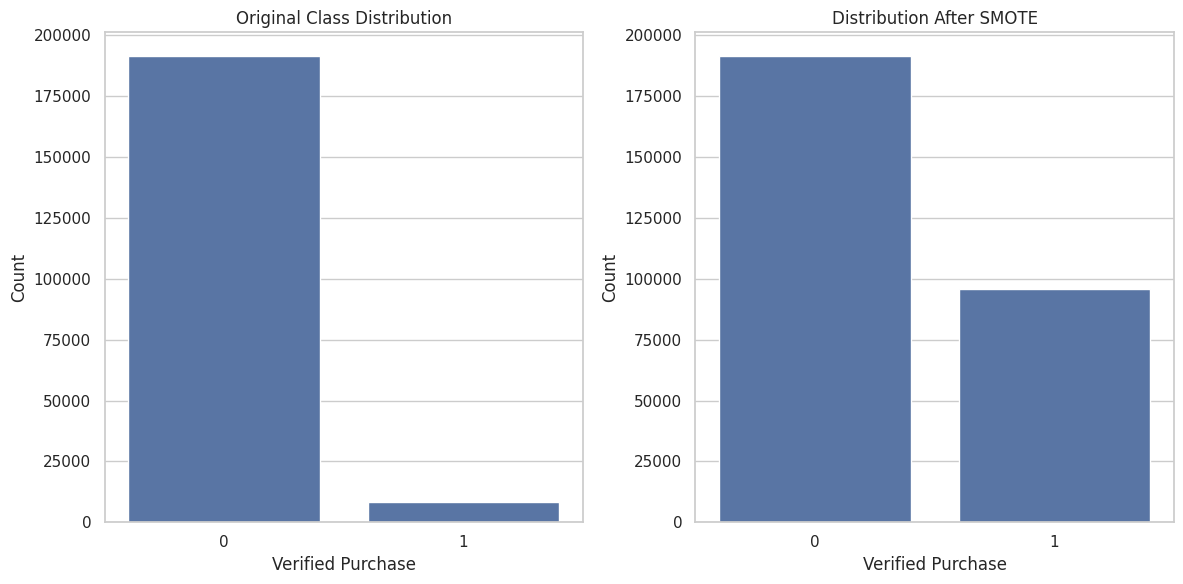

<Figure size 640x480 with 0 Axes>

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

features = [
    'rating',
    'helpful_vote',
    'n_nouns',
    'n_verbs',
    'review_sentiment_scores',
    'mention_named_entity' ,
    'n_adjectives',
]

# Splitting data
X = df[features] #IV

y = df['verified_purchase'] #DV

# Visualize original class distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.set_theme(style="whitegrid")

# Original distribution
sns.countplot(x=y, ax=axes[0])
axes[0].set_title("Original Class Distribution")
axes[0].set_xlabel("Verified Purchase")
axes[0].set_ylabel("Count")
axes[0].ticklabel_format(style='plain', axis='y')

# Apply SMOTE with 0.5 ratio
smt = SMOTE(sampling_strategy=0.5, random_state=42)
X_res, y_res = smt.fit_resample(X, y)

# Visualize new distribution
sns.countplot(x=y_res, ax=axes[1])
axes[1].set_title("Distribution After SMOTE")
axes[1].set_xlabel("Verified Purchase")
axes[1].set_ylabel("Count")
axes[1].ticklabel_format(style='plain', axis='y')


plt.tight_layout()
plt.show()
plt.savefig('class_distribution.png')

In [ ]:
print("\nClass Distribution:")
print("Original:")
print(y.value_counts().sort_index())
print("\nAfter SMOTE:")
print(y_res.value_counts().sort_index())


Class Distribution:
Original:
verified_purchase
0    191680
1      8319
Name: count, dtype: int64

After SMOTE:
verified_purchase
0    191680
1     95840
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split

# Split first
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res,
    test_size=0.2,  # 80% train, 20% test
    random_state=42
)

# Scale only for Logistic Regression
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Logistic Regression (with scaled data), optmizing performance after reading this: https://blog.dailydoseofds.com/p/feature-scaling-is-not-always-necessary
lr_model = LogisticRegression(class_weight = 'balanced',random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

print("\nLogistic Regression Results (Scaled):")
print("-" * 50)
print(classification_report(y_test, lr_pred))


Logistic Regression Results (Scaled):
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.76      0.77     38253
           1       0.55      0.59      0.57     19251

    accuracy                           0.70     57504
   macro avg       0.67      0.67      0.67     57504
weighted avg       0.71      0.70      0.71     57504



In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

lr_probs = lr_model.predict_proba(X_test_scaled)[:, 1]

print(f"ROC AUC Score: {roc_auc_score(y_test, lr_probs):.3f}")

ROC AUC Score: 0.732


In [ ]:
#Documentation: https://www.geeksforgeeks.org/precision-recall-curve-ml/
from sklearn.metrics import precision_recall_curve, auc

# Predict probabilities for positive class
lr_y_scores = lr_model.predict_proba(X_test)[:, 1]

# Calculate Precision-Recall curve
precision_lr, recall_lr, _ = precision_recall_curve(y_test, lr_y_scores)

# Calculate PR AUC
pr_auc_lr = auc(recall_lr, precision_lr)

# Print PR AUC score for LR
print(f"Logistic Regression PR AUC (Precision-Recall AUC): {pr_auc_lr:.2f}")

Logistic Regression PR AUC (Precision-Recall AUC): 0.66


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


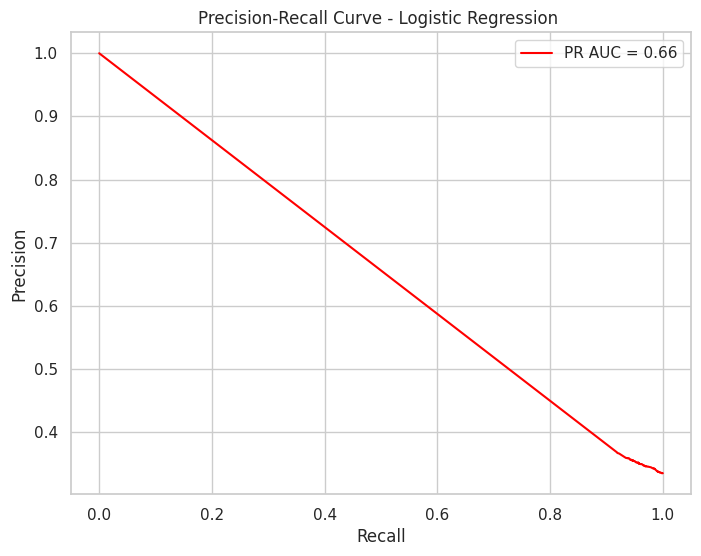

In [ ]:
# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_lr, precision_lr, label=f'PR AUC = {pr_auc_lr:.2f}', color = 'red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression ')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix_lr = confusion_matrix(y_test, lr_pred)
print("Confusion Matrix (Logistic Regression):")
print(conf_matrix_lr)

Confusion Matrix (Logistic Regression):
[[29135  9118]
 [ 7960 11291]]


In [ ]:
# Model Two: Decision Tree with NLP-based Features

# Split first
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res,
    test_size=0.2,  # 80% train, 20% test
    random_state=42
)

dt_model = DecisionTreeClassifier(class_weight= 'balanced', random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print("Decision Tree Results:")
print("-" * 50)
print(classification_report(y_test, dt_pred))

Decision Tree Results:
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.88      0.88     38253
           1       0.76      0.73      0.75     19251

    accuracy                           0.83     57504
   macro avg       0.81      0.81      0.81     57504
weighted avg       0.83      0.83      0.83     57504



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix_dt = confusion_matrix(y_test, dt_pred)
print("Confusion Matrix (Decision Tree):")
print(conf_matrix_dt)

Confusion Matrix (Decision Tree):
[[33791  4462]
 [ 5115 14136]]


In [ ]:
dt_probs = dt_model.predict_proba(X_test)[:, 1]
print(f"ROC AUC Score: {roc_auc_score(y_test, dt_probs):.3f}")

ROC AUC Score: 0.814


In [ ]:
#Documentation: https://www.geeksforgeeks.org/precision-recall-curve-ml/

# Get the predicted probabilities for the positive class (class 1)
dt_y_pred_proba = dt_model.predict_proba(X_test)[:, 1]

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, dt_y_pred_proba)

# Calculate PR AUC
pr_auc = auc(recall, precision)

# Print PR AUC score
print(f"PR AUC (Precision-Recall AUC): {pr_auc:.2f}")

PR AUC (Precision-Recall AUC): 0.78


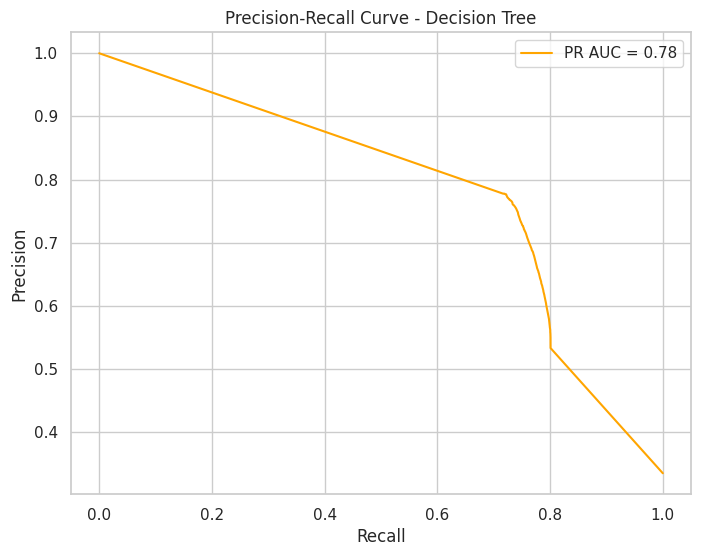

In [ ]:
# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}', color='orange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Decision Tree')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
# Model Three: Random Forest Classifier with NLP-based features
from sklearn.ensemble import RandomForestClassifier

# Split first
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res,
    test_size=0.2,  # 80% train, 20% test
    random_state=42
)

rf_model = RandomForestClassifier(class_weight= 'balanced', random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Results:")
print("-" * 50)
print(classification_report(y_test, rf_pred))

Random Forest Results:
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     38253
           1       0.81      0.75      0.78     19251

    accuracy                           0.86     57504
   macro avg       0.84      0.83      0.84     57504
weighted avg       0.86      0.86      0.86     57504



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix (Random Forest):")
print(conf_matrix)

Confusion Matrix (Random Forest):
[[34864  3389]
 [ 4795 14456]]


In [ ]:
rf_probs = rf_model.predict_proba(X_test)[:, 1]
print(f"ROC AUC Score: {roc_auc_score(y_test, rf_probs):.3f}")

ROC AUC Score: 0.903


In [ ]:
# Get the predicted probabilities for the positive class (class 1)
rf_y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, rf_y_pred_proba)

# Calculate PR AUC
pr_auc = auc(recall, precision)

# Print PR AUC score
print(f"PR AUC (Precision-Recall AUC): {pr_auc:.2f}")

PR AUC (Precision-Recall AUC): 0.86


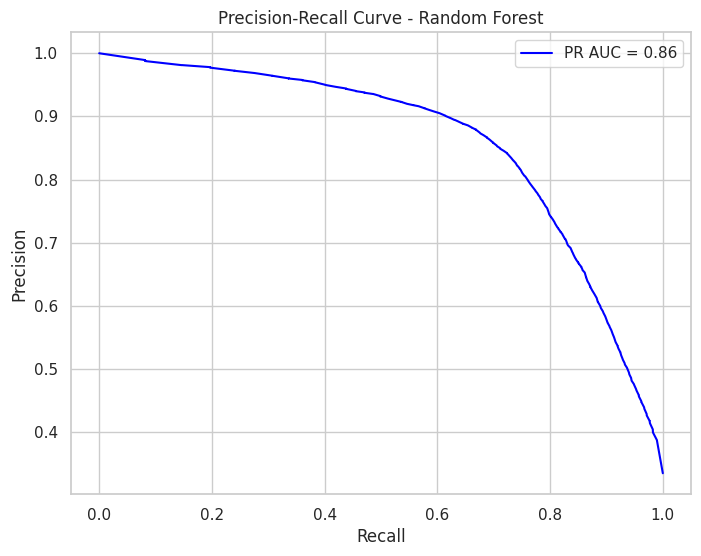

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
print('*' * 100)

****************************************************************************************************
